In [46]:
import numpy
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [47]:
dataset = pd.read_csv('C:/Users/Krishna Veer Singh/Downloads/Winton_Stock_Prediction/train.csv')
dataset.fillna(dataset.mean(axis=0), inplace=True)
dataset.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Ret_175,Ret_176,Ret_177,Ret_178,Ret_179,Ret_180,Ret_PlusOne,Ret_PlusTwo,Weight_Intraday,Weight_Daily
0,3.59025,-0.117558,0.558392,0.405572,8,0.430972,75751,0.2254,11.0,4.744703,...,-0.002688,0.002246,-0.000838,-6.953220e-04,0.000003,-0.001974,-0.019512,0.028846,1251507.966,1564384.957
1,3.59025,-0.117558,0.558392,0.405572,3,0.388896,17369,0.0166,13.0,4.744703,...,-0.000129,0.000123,0.000248,3.320000e-07,0.000003,0.000027,-0.002939,-0.010253,1733950.349,2167437.936
2,3.59025,-0.696727,0.739591,-0.167928,9,0.471947,8277,0.3650,9.0,5.000000,...,-0.000524,-0.000394,0.000116,5.322560e-04,0.000274,0.000784,-0.024791,0.015711,1529197.383,1911496.729
3,3.59025,-0.694350,1.568248,0.479073,5,0.120653,22508,0.2654,13.0,5.000000,...,0.000346,-0.000090,0.000288,-1.281100e-04,0.000074,0.000341,-0.005680,-0.002190,1711569.424,2139461.780
4,6.00000,-1.736489,2.765531,1.245280,7,4.866985,22423,0.2138,13.0,4.000000,...,-0.001235,0.000027,0.002449,8.620000e-06,0.001209,-0.000004,0.036104,-0.026552,1267270.265,1584087.831


In [48]:
X = dataset.iloc[:,0:27]
Y = dataset.iloc[:,85]

In [49]:
X.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Ret_MinusTwo,Ret_MinusOne
0,3.59025,-0.117558,0.558392,0.405572,8,0.430972,75751,0.2254,11.0,4.744703,...,0.803059,-0.925463,2.0,0.605593,-0.489492,0.799833,-1.209290,-0.329675,0.055275,-0.010770
1,3.59025,-0.117558,0.558392,0.405572,3,0.388896,17369,0.0166,13.0,4.744703,...,0.917958,-0.897067,9.0,0.886205,-0.151805,1.239856,0.953424,-0.709462,0.009748,0.002987
2,3.59025,-0.696727,0.739591,-0.167928,9,0.471947,8277,0.3650,9.0,5.000000,...,1.799813,-1.603488,3.0,0.605593,0.389061,1.728096,-1.798090,-1.019370,0.003077,0.006181
3,3.59025,-0.694350,1.568248,0.479073,5,0.120653,22508,0.2654,13.0,5.000000,...,1.565036,-1.205438,7.0,1.148738,-2.440799,1.551425,-1.788725,-0.329675,0.000984,0.014106
4,6.00000,-1.736489,2.765531,1.245280,7,4.866985,22423,0.2138,13.0,4.000000,...,-3.208872,-1.102189,7.0,3.381040,1.732708,1.965189,-5.993092,3.219820,-0.018224,0.011065


In [50]:
X.shape

(40000, 27)

In [51]:
Y.head()

0   -0.000723
1   -0.000228
2   -0.000144
3   -0.000294
4    0.000004
Name: Ret_60, dtype: float64

In [52]:
Y.shape

(40000,)

In [53]:
scaler_x = MinMaxScaler()
scaler_x.fit(X)
xscale=scaler_x.transform(X)

D:\E\anaconda\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [54]:
model = Sequential()
model.add(Dense(12, input_dim=27, kernel_initializer='normal'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 12)                336       
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 9         
Total params: 449
Trainable params: 449
Non-trainable params: 0
_________________________________________________________________


In [55]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

In [56]:
history = model.fit(xscale, Y,epochs=10, batch_size=50)

Epoch 1/10
40000/40000 [==============================] - 3s 66us/step - loss: 9.9734e-05 - mean_squared_error: 9.9734e-05 - mean_absolute_error: 0.0019
Epoch 2/10
40000/40000 [==============================] - 1s 25us/step - loss: 8.9499e-07 - mean_squared_error: 8.9499e-07 - mean_absolute_error: 5.4039e-04
Epoch 3/10
40000/40000 [==============================] - 1s 25us/step - loss: 8.8272e-07 - mean_squared_error: 8.8272e-07 - mean_absolute_error: 5.4138e-04
Epoch 4/10
40000/40000 [==============================] - 1s 25us/step - loss: 8.7931e-07 - mean_squared_error: 8.7931e-07 - mean_absolute_error: 5.4087e-04
Epoch 5/10
40000/40000 [==============================] - 1s 25us/step - loss: 8.8327e-07 - mean_squared_error: 8.8327e-07 - mean_absolute_error: 5.4589e-04
Epoch 6/10
40000/40000 [==============================] - 1s 25us/step - loss: 8.9078e-07 - mean_squared_error: 8.9078e-07 - mean_absolute_error: 5.5305e-04
Epoch 7/10
40000/40000 [==============================] - 1s 3

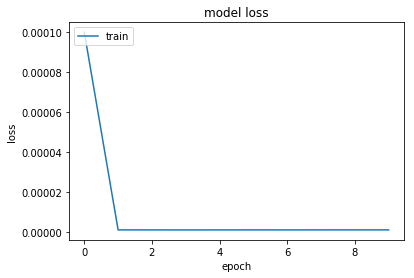

In [57]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [58]:
dataset2 = pd.read_csv('C:/Users/Krishna Veer Singh/Downloads/Winton_Stock_Prediction/test_2.csv')
dataset2.fillna(dataset.mean(axis=0), inplace=True)

In [59]:
Xnew = dataset2.iloc[:,0:27] 
ynew = dataset2.iloc[:,85]
scaler_x= MinMaxScaler()
scaler_x.fit(Xnew)
xscale=scaler_x.transform(Xnew)
Ynew = model.predict(xscale)
Xnew.shape

D:\E\anaconda\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


(120000, 27)

In [60]:
xscale

array([[0.        , 0.63767922, 0.49419209, ..., 0.26685367, 0.37411451,
        0.23967485],
       [0.28780553, 0.4410457 , 0.6016862 , ..., 0.21975195, 0.39408551,
        0.2328154 ],
       [0.28780553, 0.37808232, 0.62049203, ..., 0.2844762 , 0.35567051,
        0.21862685],
       ...,
       [0.        , 0.31668685, 0.59710312, ..., 0.17318527, 0.36749732,
        0.21286253],
       [0.22222222, 0.34397116, 0.6690157 , ..., 0.20300628, 0.37690635,
        0.22924215],
       [0.28780553, 0.4410457 , 0.51376166, ..., 0.2919293 , 0.38575556,
        0.24121012]])

In [61]:
xscale.shape

(120000, 27)

In [62]:
Ynew

array([[-4.4462249e-05],
       [-4.9278024e-05],
       [-4.9278024e-05],
       ...,
       [-4.9278024e-05],
       [ 2.1908927e-05],
       [-4.9278024e-05]], dtype=float32)

In [63]:
Ynew.shape

(120000, 1)

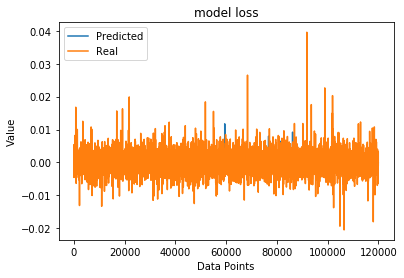

array([[-4.4462249e-05],
       [-4.9278024e-05],
       [-4.9278024e-05],
       ...,
       [-4.9278024e-05],
       [ 2.1908927e-05],
       [-4.9278024e-05]], dtype=float32)

In [64]:
plt.plot(Ynew)
plt.plot(ynew)
plt.title('model loss')
plt.ylabel('Value')
plt.xlabel('Data Points')
plt.legend(['Predicted','Real'], loc='upper left')
plt.show()
Ynew


In [65]:
import xgboost as xgb
from sklearn.metrics import accuracy_score


In [66]:
n_folds = 5

def rmsle_cv(model):
    rmse= numpy.sqrt(-cross_val_score(model, X, Y, scoring="neg_mean_squared_error"))
    return(rmse)

In [67]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)


In [68]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

y_pred = model.predict(xscale)
predictions = [numpy.round(value) for value in y_pred]

D:\E\anaconda\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
D:\E\anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\E\anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\E\anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Xgboost score: 0.0009 (0.0000)



In [69]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [70]:
xscale = np.reshape(xscale, (xscale.shape[0], xscale.shape[1], 1))

In [71]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


In [72]:
regressor = Sequential()

regressor.add(LSTM(units = 10, return_sequences = True, input_shape = (xscale.shape[1], 1)))
regressor.add(Dropout(0.025))

regressor.add(LSTM(units = 10, return_sequences = True))
regressor.add(Dropout(0.025))

regressor.add(LSTM(units = 10, return_sequences = True))
regressor.add(Dropout(0.025))

regressor.add(LSTM(units = 10))
regressor.add(Dropout(0.025))

regressor.add(Dense(units = 1))


In [79]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=['mse','mae'])

In [80]:
regressor.fit(xscale, ynew, epochs = 5, batch_size = 50)
xscale= np.reshape(xscale, (xscale.shape[0], xscale.shape[1], 1))
predicted_stock_price = regressor.predict(xscale)


Epoch 1/5
120000/120000 [==============================] - 162s 1ms/step - loss: 1.0190e-06 - mean_squared_error: 1.0190e-06 - mean_absolute_error: 6.1870e-04
Epoch 2/5
120000/120000 [==============================] - 160s 1ms/step - loss: 9.7108e-07 - mean_squared_error: 9.7108e-07 - mean_absolute_error: 5.9210e-04
Epoch 3/5
120000/120000 [==============================] - 156s 1ms/step - loss: 9.5905e-07 - mean_squared_error: 9.5905e-07 - mean_absolute_error: 5.8275e-040s - loss: 9.5990e-07 - mean_squared_error: 9.5990e-07 - mea
Epoch 4/5
120000/120000 [==============================] - 165s 1ms/step - loss: 9.5416e-07 - mean_squared_error: 9.5416e-07 - mean_absolute_error: 5.7778e-04
Epoch 5/5
120000/120000 [==============================] - 161s 1ms/step - loss: 9.4868e-07 - mean_squared_error: 9.4868e-07 - mean_absolute_error: 5.7486e-04


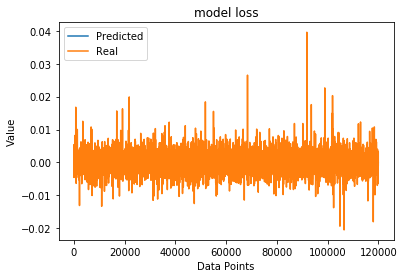

array([[-1.5357317e-06],
       [-1.5847909e-06],
       [-1.5811443e-06],
       ...,
       [-1.5371421e-06],
       [-1.5884139e-06],
       [-1.6578866e-06]], dtype=float32)

In [81]:
plt.plot(predicted_stock_price)
plt.plot(ynew)
plt.title('model loss')
plt.ylabel('Value')
plt.xlabel('Data Points')
plt.legend(['Predicted','Real'], loc='upper left')
plt.show()

predicted_stock_price


In [82]:
dataset.shape

(40000, 210)

In [83]:
cols = dataset.columns
index = cols[27:205]
index

Index(['Ret_2', 'Ret_3', 'Ret_4', 'Ret_5', 'Ret_6', 'Ret_7', 'Ret_8', 'Ret_9',
       'Ret_10', 'Ret_11',
       ...
       'Ret_170', 'Ret_171', 'Ret_172', 'Ret_173', 'Ret_174', 'Ret_175',
       'Ret_176', 'Ret_177', 'Ret_178', 'Ret_179'],
      dtype='object', length=178)

In [84]:

returns = cols[28:206]

returns

Index(['Ret_3', 'Ret_4', 'Ret_5', 'Ret_6', 'Ret_7', 'Ret_8', 'Ret_9', 'Ret_10',
       'Ret_11', 'Ret_12',
       ...
       'Ret_171', 'Ret_172', 'Ret_173', 'Ret_174', 'Ret_175', 'Ret_176',
       'Ret_177', 'Ret_178', 'Ret_179', 'Ret_180'],
      dtype='object', length=178)

In [85]:
for i in range(118):
  dataset[returns[i]] = dataset[returns[i]] +dataset[index[i]]

In [86]:
dataset.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Ret_175,Ret_176,Ret_177,Ret_178,Ret_179,Ret_180,Ret_PlusOne,Ret_PlusTwo,Weight_Intraday,Weight_Daily
0,3.59025,-0.117558,0.558392,0.405572,8,0.430972,75751,0.2254,11.0,4.744703,...,-0.002688,0.002246,-0.000838,-6.953220e-04,0.000003,-0.001974,-0.019512,0.028846,1251507.966,1564384.957
1,3.59025,-0.117558,0.558392,0.405572,3,0.388896,17369,0.0166,13.0,4.744703,...,-0.000129,0.000123,0.000248,3.320000e-07,0.000003,0.000027,-0.002939,-0.010253,1733950.349,2167437.936
2,3.59025,-0.696727,0.739591,-0.167928,9,0.471947,8277,0.3650,9.0,5.000000,...,-0.000524,-0.000394,0.000116,5.322560e-04,0.000274,0.000784,-0.024791,0.015711,1529197.383,1911496.729
3,3.59025,-0.694350,1.568248,0.479073,5,0.120653,22508,0.2654,13.0,5.000000,...,0.000346,-0.000090,0.000288,-1.281100e-04,0.000074,0.000341,-0.005680,-0.002190,1711569.424,2139461.780
4,6.00000,-1.736489,2.765531,1.245280,7,4.866985,22423,0.2138,13.0,4.000000,...,-0.001235,0.000027,0.002449,8.620000e-06,0.001209,-0.000004,0.036104,-0.026552,1267270.265,1584087.831


In [87]:
xscale = np.reshape(xscale, (xscale.shape[0], xscale.shape[1], 1))

In [88]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


In [89]:
regressor = Sequential()

regressor.add(LSTM(units = 10, return_sequences = True, input_shape = (xscale.shape[1], 1)))
regressor.add(Dropout(0.025))

regressor.add(LSTM(units = 10, return_sequences = True))
regressor.add(Dropout(0.025))

regressor.add(LSTM(units = 10, return_sequences = True))
regressor.add(Dropout(0.025))

regressor.add(LSTM(units = 10))
regressor.add(Dropout(0.025))

regressor.add(Dense(units = 1))


In [90]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error' , metrics=['mse','mae'])

In [91]:
regressor.fit(xscale,ynew, epochs = 5, batch_size = 50)
xscale = np.reshape(xscale, (xscale.shape[0], xscale.shape[1], 1))
predicted_stock_price1 = regressor.predict(xscale)


Epoch 1/5
120000/120000 [==============================] - 176s 1ms/step - loss: 2.9635e-06 - mean_squared_error: 2.9635e-06 - mean_absolute_error: 8.8156e-04
Epoch 2/5
120000/120000 [==============================] - 167s 1ms/step - loss: 1.0275e-06 - mean_squared_error: 1.0275e-06 - mean_absolute_error: 6.3251e-04
Epoch 3/5
120000/120000 [==============================] - 168s 1ms/step - loss: 1.0180e-06 - mean_squared_error: 1.0180e-06 - mean_absolute_error: 6.2729e-04
Epoch 4/5
120000/120000 [==============================] - 170s 1ms/step - loss: 9.8503e-07 - mean_squared_error: 9.8503e-07 - mean_absolute_error: 6.0317e-04
Epoch 5/5
120000/120000 [==============================] - 165s 1ms/step - loss: 9.6071e-07 - mean_squared_error: 9.6071e-07 - mean_absolute_error: 5.8506e-04


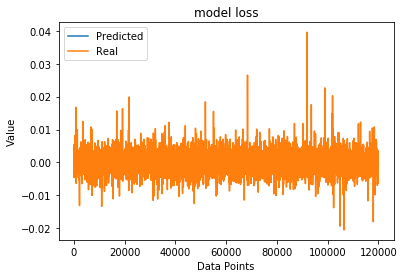

array([[-0.0004134 ],
       [-0.0004149 ],
       [-0.00041224],
       ...,
       [-0.00040708],
       [-0.00041483],
       [-0.00041614]], dtype=float32)

In [92]:
plt.plot(predicted_stock_price1)
plt.plot(ynew)
plt.title('model loss')
plt.ylabel('Value')
plt.xlabel('Data Points')
plt.legend(['Predicted','Real'], loc='upper left')
plt.show()

predicted_stock_price1


In [93]:
rows = zip(ynew,Ynew,predicted_stock_price,predicted_stock_price1 )
import csv

with open('new1.csv', "w") as f:
    writer = csv.writer(f)
    writer.writerow(("Actual Value", "Sequential Predicted Value", "LSTM Predicted Value", "Relative LSTM Predicted Value"))
    for row in rows:
      writer.writerow(row)

In [94]:
dataset3 = pd.read_csv('new1.csv')
dataset3

,Actual Value,Sequential Predicted Value,LSTM Predicted Value,Relative LSTM Predicted Value
0,-1.846860e-04,[-4.446225e-05],[-1.5357317e-06],[-0.0004134]
1,9.273560e-04,[-4.9278024e-05],[-1.5847909e-06],[-0.0004149]
2,1.753890e-04,[-4.9278024e-05],[-1.5811443e-06],[-0.00041224]
3,1.647720e-04,[-4.9278024e-05],[-1.5166164e-06],[-0.00041361]
4,-1.090000e-06,[-4.9278024e-05],[-1.555173e-06],[-0.0004132]
5,4.670000e-06,[-4.9278024e-05],[-1.6254426e-06],[-0.00042091]
6,3.295210e-04,[-4.9278024e-05],[-1.5670929e-06],[-0.00040723]
7,-7.975990e-04,[-4.9278024e-05],[-1.6065568e-06],[-0.00041145]
8,7.420000e-06,[-4.9278024e-05],[-1.6127049e-06],[-0.00041077]
9,-1.913230e-04,[-4.9278024e-05],[-1.5673495e-06],[-0.0004132]
